In [38]:
import pandas as pd
import pytextrank
import spacy
from spacy.tokens import Span
from germalemma import GermaLemma
from keybert import KeyBERT
import pandas as pd

In [39]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU
Name: /physical_device:GPU:1   Type: GPU
Name: /physical_device:GPU:2   Type: GPU
Name: /physical_device:GPU:3   Type: GPU


In [40]:
#set GPU
gpus =tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[3],'GPU')
    except RuntimeError as e:
        print(e)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]


In [41]:
# data = pd.read_csv("Questionnaire_new_version.csv")

In [42]:
#Then quit and come back later… and open with pickle.load...
import pickle
with open('Data_KeyBert_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [43]:
data

Documents                      file_name  \
0    document1        Nacaps-W1_questionnaire   
1    document2                        WeGe_W2   
2    document3                      StuMa2020   
3    document4         Studierdenensurvey2016   
4    document5       Absolventen_2009.2_Haupt   
5    document6                  Promopanel_W4   
6    document7      Studienberechtigte_2008.3   
7    document8   Wissenschaftlerbefragung2016   
8    document9                  Promopanel_W3   
9   document10               Sozialerhebung20   
10  document11                        WeGe_W3   
11  document12                  Promopanel_W5   
12  document13                     sid_corona   
13  document14                  Promopanel_W2   
14  document15             Absolventen_2013-2   
15  document16   Absolventen_2009.2_Promotion   
16  document17               Sozialerhebung21   
17  document18  Absolventen_2009.2_Mobilität   
18  document19               Sozialerhebung19   

                                                 Text  \
0   "Die Hochschule, an der Sie im Dezember 2018 z...   
1   "Wie ist dieser studienvorbereitende Kurs verl...   
2   "Welchen Studienabschluss haben Sie in Ihrem l...   
3   "An welcher Art Hochschule studieren Sie. Univ...   
4   "Wie würden Sie Ihre derzeitige Tätigkeit bzw....   
5   "Waren oder sind Sie seit der letzten Befragun...   
6   "Wie zufrieden sind Sie mit Ihrem bisherigen B...   
7   "In welcher Sprache möchten Sie die Befragung ...   
8   "Waren oder sind Sie seit der letzten Befragun...   
9   "Welchen Abschluss streben Sie in Ihrem derzei...   
10  "Welches Ergebnis haben Sie bei der Sprachprüf...   
11  "Waren oder sind Sie seit der letzten Befragun...   
12  "Befinden Sie sich aktuell in einem Urlaubssem...   
13  "Haben Sie einen Ausbildungsberuf erlernt (z.B...   
14  "Waren Sie seit Ihrem Studienabschluss, den Si...   
15  "Haben Sie eine Promotion begonnen oder abgesc...   
16  "Werden Sie im Sommersemester 2016 nach dem BA...   
17  "Haben Sie noch in einer weiteren Wohnung gele...   
18  "angestrebter Abschluss.  erworbener Abschluss...   

                                         Ground_Truth  \
0   wissenschaftssystem,  betreuung,  wissenschaft...   
1   integration,  geflüchtete,  studienkolleg,  mi...   
2   beruflicher verbleib von exmatrikulierten,  st...   
3   evaluation,  qualifikation,  effizienz,  studi...   
4                                  hochschulforschung   
5                      promotion,  hochschulforschung   
6             studienberechtigte,  hochschulforschung   
7                                  hochschulforschung   
8                      promotion,  hochschulforschung   
9                                  hochschulforschung   
10  integration,  geflüchtete,  studienkolleg,  mi...   
11                     promotion,  hochschulforschung   
12  internationale studierende,  digitale lehre,  ...   
13                     promotion,  hochschulforschung   
14                   absolventen,  hochschulforschung   
15                                 hochschulforschung   
16                                 hochschulforschung   
17                                 hochschulforschung   
18                                 hochschulforschung   

                                       Text_Sentences  
0   [Die Hochschule, an der Sie im Dezember 2018 z...  
1   [Wie ist dieser studienvorbereitende Kurs verl...  
2   [Welchen Studienabschluss haben Sie in Ihrem l...  
3   [An welcher Art Hochschule studieren Sie., Wel...  
4   [Wie würden Sie Ihre derzeitige Tätigkeit bzw....  
5   [Waren oder sind Sie seit der letzten Befragun...  
6   [Wie zufrieden sind Sie mit Ihrem bisherigen B...  
7   [In welcher Sprache möchten Sie die Befragung ...  
8   [Waren oder sind Sie seit der letzten Befragun...  
9   [Welchen Abschluss streben Sie in Ihrem derzei...  
10  [Welches Ergebnis haben Sie bei der Sprachprüf...  
11  [Waren oder sind Sie seit der letzten Befragun...  
12  [Befinden 

In [44]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau","ca", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
878


In [46]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [47]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [48]:
data["clean_text"][0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren . Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben . Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden . Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden . Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert . In der Zwischenzeit kann sich daran etwas geändert haben . Bitte geben Sie an was aktuell auf Sie zutrifft . Ich promoviere . Ich habe das Promotionsverfahren abgeschlossen . Ich habe mein Promotionsvorhaben unterbrochen . Ich habe mein Promotionsvorhaben abgebrochen . Handelt es sich um eine offiziell der Hoch

In [49]:
clean_text_df=[]
for i in range(len(data["Text_Sentences"])):
    clean_text_df.append([])
    for elem in data["Text_Sentences"][i]:
        clean_text_df[i].append(clean_text(elem, for_embedding=True))

In [50]:
new_clean_text = []
for i in range(len(clean_text_df)):
    new_clean_text.append((list(filter(lambda x: x, clean_text_df[i]))))

In [51]:
data["Clean_Text_Sentences"] = new_clean_text

In [52]:
data["Clean_Text_Sentences"][15]

['Haben Sie eine Promotion begonnen oder abgeschlossen .',
 'In welchem Stadium Ihrer Promotion befinden Sie sich derzeit .',
 'Haben Sie die Arbeit an Ihrer Promotion zwischenzeitlich für einen längeren Zeitraum mind .',
 'Bestand zwischen Ihrem Studium und Ihrer Promotion ein fachlicher Zusammenhang .',
 'Mit welcher Gesamtnote haben Sie Ihre Promotion abgeschlossen .',
 'In welchem institutionellen Rahmen promovierten Sie vorwiegend .',
 'Hatten Sie eine Qualifikationsstelle eine Stelle bei der laut Arbeitsvertrag die Promotion zu Ihren Dienstaufgaben gehört .',
 'Haben Sie während Ihrer Promotionsphase Lehrerfahrungen an einer Hochschule sammeln können .',
 'Was trifft auf die von Ihnen durchgeführten Lehrveranstaltungen zu .',
 'Welche Form hat Ihre Dissertation .',
 'War Ihr Hauptbetreuer in gleichzeitig auch Gutachter in Ihrer Dissertation .',
 'Haben Sie mit Ihren Betreuer inne schriftliche Vereinbarungen zu den Zielen und Aufgaben beider Seiten im Rahmen Ihrer Promotion getrof

In [53]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau","ca", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
878


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

n_gram_range = (1, 3)
stop_words = stop_words
candidates = []
index_to_keep = []
# Extract candidate words/phrases
for i in range(len(data["Clean_Text_Sentences"])):
    candidates.append([])
    index_to_keep.append([])
    for j in range(len(data["Clean_Text_Sentences"][i])):
        check_doc =[elem.lower() for elem in data["Clean_Text_Sentences"][i][j].split()]
        if (len(set(check_doc) - set(stop_words)))>1:
            index_to_keep[i].append(j)
            count = CountVectorizer(ngram_range=n_gram_range ,stop_words=stop_words).fit([data["Clean_Text_Sentences"][i][j]])
            candidates[i].append(count.get_feature_names())

/home/pawan/.local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ernst', 'ordnung', 'schluss'] not in stop_words.
  % sorted(inconsistent)


In [55]:
candidates[14]

[['erwerbstätig',
  'erworben',
  'erworben irgendeiner',
  'erworben irgendeiner form',
  'form',
  'form erwerbstätig',
  'irgendeiner',
  'irgendeiner form',
  'irgendeiner form erwerbstätig',
  'studienabschluss',
  'studienabschluss erworben',
  'studienabschluss erworben irgendeiner'],
 ['aktuellen',
  'aktuellen erwerbstätigkeit',
  'aktuellen erwerbstätigkeit anwendung',
  'anwendung',
  'erwerbstätigkeit',
  'erwerbstätigkeit anwendung',
  'fähigkeiten',
  'fähigkeiten aktuellen',
  'fähigkeiten aktuellen erwerbstätigkeit',
  'wissen',
  'wissen fähigkeiten',
  'wissen fähigkeiten aktuellen'],
 ['bieten',
  'erfordert',
  'erfordert erwerbstätigkeit',
  'erfordert erwerbstätigkeit wissen',
  'erwerbstätigkeit',
  'erwerbstätigkeit wissen',
  'erwerbstätigkeit wissen fähigkeiten',
  'fähigkeiten',
  'fähigkeiten tatsächlich',
  'fähigkeiten tatsächlich bieten',
  'tatsächlich',
  'tatsächlich bieten',
  'wissen',
  'wissen fähigkeiten',
  'wissen fähigkeiten tatsächlich'],
 ['b

In [56]:
index_to_keep[0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [57]:
from sentence_transformers import SentenceTransformer # For base bert model, we can use sentence transformer model
model = SentenceTransformer("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli")  #("smanjil/German-MedBERT") #("dbmdz/bert-base-german-cased") # Sahajtomar/German-semantic   #sentence similarity

In [58]:
candidate_embeddings = []
for i in range(len(candidates)):
    candidate_embeddings.append([])
    for j in range(len(candidates[i])):
        candidate_embeddings[i].append(model.encode(candidates[i][j]))

In [59]:
len(candidate_embeddings[0][0])

24

In [60]:
text_for_doc_embeddings = []
for i in range(len(data["Clean_Text_Sentences"])):
    text_for_doc_embeddings.append([data["Clean_Text_Sentences"][i] [x] for x in index_to_keep[i]])

In [61]:
len(text_for_doc_embeddings[0])

502

In [62]:
doc_embeddings = []
for i in range(len(text_for_doc_embeddings)):
    doc_embeddings.append([])
    for j in range(len(text_for_doc_embeddings[i])):
        doc_embeddings[i].append(model.encode([text_for_doc_embeddings[i][j]]))

In [63]:
len(candidate_embeddings[0][501])

6

In [64]:
len(doc_embeddings[0][0])

1

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
# top_n = 40
keywords = []
for i in range(len(doc_embeddings)):
    print(i,flush=True)
    keywords.append([])
    for j in range(len(doc_embeddings[i])):
        similarity = cosine_similarity(doc_embeddings[i][j], candidate_embeddings[i][j])
        keywords[i].append([(candidates[i][j][index],similarity[0][index]) for index in similarity.argsort()[0]])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [66]:
keywords[0]

[[('ebenfalls', 0.036702383),
  ('registriert ebenfalls', 0.06922848),
  ('dezember', 0.07963242),
  ('registriert', 0.088837),
  ('ebenfalls interesse', 0.11846247),
  ('registriert ebenfalls interesse', 0.14012301),
  ('interesse', 0.14114642),
  ('erfahren', 0.16334012),
  ('dezember promotion', 0.20947239),
  ('promotionsbedingungen', 0.24936512),
  ('promotion registriert ebenfalls', 0.25305283),
  ('promotion', 0.25810325),
  ('ebenfalls interesse promotionsbedingungen', 0.27718303),
  ('promotion registriert', 0.2894072),
  ('interesse promotionsbedingungen', 0.30736583),
  ('promotionsbedingungen promovierenden', 0.30832952),
  ('dezember promotion registriert', 0.3241081),
  ('interesse promotionsbedingungen promovierenden', 0.325044),
  ('promovierenden', 0.33527702),
  ('hochschule', 0.33545062),
  ('promotionsbedingungen promovierenden erfahren', 0.37520644),
  ('hochschule dezember', 0.3771146),
  ('hochschule dezember promotion', 0.37986237),
  ('promovierenden erfahren',

In [67]:
##flattening the list
new_set_keywords= []
for i in range(len(keywords)):
    new_set_keywords.append([item for sublist in keywords[i] for item in sublist])

In [68]:
new_set_keywords[0]

[('ebenfalls', 0.036702383),
 ('registriert ebenfalls', 0.06922848),
 ('dezember', 0.07963242),
 ('registriert', 0.088837),
 ('ebenfalls interesse', 0.11846247),
 ('registriert ebenfalls interesse', 0.14012301),
 ('interesse', 0.14114642),
 ('erfahren', 0.16334012),
 ('dezember promotion', 0.20947239),
 ('promotionsbedingungen', 0.24936512),
 ('promotion registriert ebenfalls', 0.25305283),
 ('promotion', 0.25810325),
 ('ebenfalls interesse promotionsbedingungen', 0.27718303),
 ('promotion registriert', 0.2894072),
 ('interesse promotionsbedingungen', 0.30736583),
 ('promotionsbedingungen promovierenden', 0.30832952),
 ('dezember promotion registriert', 0.3241081),
 ('interesse promotionsbedingungen promovierenden', 0.325044),
 ('promovierenden', 0.33527702),
 ('hochschule', 0.33545062),
 ('promotionsbedingungen promovierenden erfahren', 0.37520644),
 ('hochschule dezember', 0.3771146),
 ('hochschule dezember promotion', 0.37986237),
 ('promovierenden erfahren', 0.43217158),
 ('anfang'

In [69]:
def avg(second_tuple_element):
    return sum(second_tuple_element)/len(second_tuple_element)

result = []
for i in range(len(new_set_keywords)):
    result.append([(n, avg([v[1] for v in new_set_keywords[i] if v[0] == n])) for n in set([n[0] for n in new_set_keywords[i]])])

In [70]:
result[1]

[('arbeitsagentur leistungen asylbewerber', 0.25236865878105164),
 ('unterstützung familie stipendium', 0.5785135626792908),
 ('entsprechen', -0.008105192333459854),
 ('ansprüchen zurechtkommen', 0.23147262632846832),
 ('berufsperspektiven entwickeln berufliche', 0.8139722347259521),
 ('studiere', 0.1347792148590088),
 ('kurse tutorien akademisches', 0.1628512740135193),
 ('mache job zurzeit', 0.41520294547080994),
 ('denken letzten', 0.2964692711830139),
 ('hausfrau', -0.008591355755925179),
 ('ausgeschlossen ausgeschlossen dazugehörig', 0.26840323209762573),
 ('app muttersprache', 0.4843117594718933),
 ('testdaf prüfung erhalten', 0.43948107957839966),
 ('studienvorbereitungskurs', 0.5522021055221558),
 ('fähigkeiten ausreichend', 0.08223726600408554),
 ('wovon', -0.0316864475607872),
 ('zurechtzukommen prüfungen', 0.7129163146018982),
 ('monate', -0.09501633048057556),
 ('vorzeitig abgebrochen', 0.25135940313339233),
 ('durchführung kurses passte', 0.2685679793357849),
 ('ausreichen

In [71]:
#sorted in descending order
updated_unique_keyword = []
for i in range(len(result)):
    updated_unique_keyword.append(sorted(result[i],key=lambda x: x[1], reverse= True))

In [72]:
updated_unique_keyword[0]

[('gründlich arbeitet', 0.966168999671936),
 ('gesundheitliche probleme', 0.9559922814369202),
 ('wissenschaftliche mitarbeiter insgesamt', 0.9516664743423462),
 ('durchführen experimenten', 0.9456188678741455),
 ('verfahren konfliktfällen', 0.9445714950561523),
 ('mangelnde fremdsprachenkenntnisse', 0.9330438375473022),
 ('mitwirken aufbau forschungsinfrastruktur', 0.9311208128929138),
 ('verhält engagiert', 0.9308372139930725),
 ('hohe arbeitsbelastung berufliche', 0.9307920932769775),
 ('kommunikativ gesprächig', 0.9188627004623413),
 ('transferable skills workshops', 0.9184017181396484),
 ('analysieren daten', 0.917448103427887),
 ('ausüben verwaltungstätigkeiten', 0.9148011803627014),
 ('arbeiten team', 0.9147207736968994),
 ('hohe arbeitsbelastung', 0.9116836786270142),
 ('kulturelle schwierigkeiten', 0.9105595946311951),
 ('finanzierung publikationen', 0.9086747169494629),
 ('publikationen verschriftlichen ergebnissen', 0.9080945253372192),
 ('teaching professionals', 0.90691256

In [73]:
#separating into different lists containing unigrams, bigrams and trigrams
new_filtered_unigrams = []
new_filtered_Bi = []
new_filtered_tri = []
for i in range(len(updated_unique_keyword)):
    new_filtered_unigrams.append([])
    new_filtered_Bi.append([])
    new_filtered_tri.append([])
    for elem in updated_unique_keyword[i]:
        if len(elem[0].split()) ==1:
            new_filtered_unigrams[i].append(elem)
        elif len(elem[0].split()) ==2:
            new_filtered_Bi[i].append(elem)
        else:
            new_filtered_tri[i].append(elem)

In [74]:
new_filtered_unigrams[0]

[('gesellschaftspolitischen', 0.9065039753913879),
 ('verwaltungstätigkeiten', 0.8797916173934937),
 ('forschungsdaten', 0.853687047958374),
 ('experimenten', 0.8527196049690247),
 ('zurückhaltend', 0.8481730222702026),
 ('arbeitstitel', 0.846910297870636),
 ('aufstiegsmöglichkeiten', 0.8412142992019653),
 ('konfliktfällen', 0.8100175857543945),
 ('kommunikativ', 0.783941388130188),
 ('examensarbeiten', 0.7477394342422485),
 ('workshops', 0.7276264131069183),
 ('engagiert', 0.7211453914642334),
 ('gesundheitliche', 0.7155857086181641),
 ('startup', 0.7107547521591187),
 ('forschungsinfrastruktur', 0.7095290422439575),
 ('promotions', 0.69941246509552),
 ('basic', 0.6977801322937012),
 ('gesprächig', 0.6944156885147095),
 ('manchmal', 0.6906177997589111),
 ('freiberufler', 0.68816739320755),
 ('teaching', 0.6851444244384766),
 ('professor', 0.6844446063041687),
 ('faul', 0.6825243234634399),
 ('publikationen', 0.6726667881011963),
 ('inspiriert', 0.6713123321533203),
 ('arbeitsbelastung

In [75]:
new_filtered_Bi[0]

[('gründlich arbeitet', 0.966168999671936),
 ('gesundheitliche probleme', 0.9559922814369202),
 ('durchführen experimenten', 0.9456188678741455),
 ('verfahren konfliktfällen', 0.9445714950561523),
 ('mangelnde fremdsprachenkenntnisse', 0.9330438375473022),
 ('verhält engagiert', 0.9308372139930725),
 ('kommunikativ gesprächig', 0.9188627004623413),
 ('analysieren daten', 0.917448103427887),
 ('ausüben verwaltungstätigkeiten', 0.9148011803627014),
 ('arbeiten team', 0.9147207736968994),
 ('hohe arbeitsbelastung', 0.9116836786270142),
 ('kulturelle schwierigkeiten', 0.9105595946311951),
 ('finanzierung publikationen', 0.9086747169494629),
 ('teaching professionals', 0.9069125652313232),
 ('eher faul', 0.8944304585456848),
 ('entwickeln forschungsideen', 0.8793941140174866),
 ('verfassen berichten', 0.8762173652648926),
 ('selbstständigkeit freiberufler', 0.8760449290275574),
 ('promotionsverfahren fachhochschule', 0.8748866319656372),
 ('tätigkeit startup', 0.8731595277786255),
 ('postdo

In [76]:
new_filtered_tri[0]

[('wissenschaftliche mitarbeiter insgesamt', 0.9516664743423462),
 ('mitwirken aufbau forschungsinfrastruktur', 0.9311208128929138),
 ('hohe arbeitsbelastung berufliche', 0.9307920932769775),
 ('transferable skills workshops', 0.9184017181396484),
 ('publikationen verschriftlichen ergebnissen', 0.9080945253372192),
 ('wissenschaftliche mitarbeiter fach', 0.9025882482528687),
 ('konzeption forschungs erhebungsdesigns', 0.8993948698043823),
 ('vereinbarkeit beruf familie', 0.8992099761962891),
 ('fehlende beratungs unterstützungsangebote', 0.8969952464103699),
 ('schreiben sonstiger fachtexte', 0.8835583925247192),
 ('künstlerische ästhetische erfahrungen', 0.8811715245246887),
 ('veränderung lebenssituation partnerin', 0.878004789352417),
 ('tätigkeit startup unternehmen', 0.8579913377761841),
 ('vereinbarkeit promotion familie', 0.8550827503204346),
 ('forschungsdaten experimentieren messen', 0.8532384037971497),
 ('manuskripten reviewertätigkeit fachzeitschriften', 0.853161633014679),

In [77]:
#have to change the code later
# normalizing by dividing the relevance score of each keywords/keyphrase with the best relvance score.
new_unigrams = []
for i in range(len(new_filtered_unigrams)):
    max_score = new_filtered_unigrams[i][0][1]
    new_unigrams.append([])
    for j in range(len(new_filtered_unigrams[i])):
        temp = (new_filtered_unigrams[i][j][1])/max_score
        new_unigrams[i].append((new_filtered_unigrams[i][j][0],temp)) 

In [78]:
new_unigrams[0]

[('gesellschaftspolitischen', 1.0),
 ('verwaltungstätigkeiten', 0.970532552837001),
 ('forschungsdaten', 0.9417355810158362),
 ('experimenten', 0.9406683568054497),
 ('zurückhaltend', 0.9356528435564768),
 ('arbeitstitel', 0.9342598828703182),
 ('aufstiegsmöglichkeiten', 0.9279764038969234),
 ('konfliktfällen', 0.8935620887979726),
 ('kommunikativ', 0.8647964150314036),
 ('examensarbeiten', 0.82486062338492),
 ('workshops', 0.8026731628978921),
 ('engagiert', 0.7955236943697627),
 ('gesundheitliche', 0.7893905907133018),
 ('startup', 0.7840613736440003),
 ('forschungsinfrastruktur', 0.7827092450836904),
 ('promotions', 0.7715492530449687),
 ('basic', 0.769748562870263),
 ('gesprächig', 0.7660371133120423),
 ('manchmal', 0.7618475136424341),
 ('freiberufler', 0.7591443743094785),
 ('teaching', 0.7558096191940712),
 ('professor', 0.7550376224314472),
 ('faul', 0.7529192833034807),
 ('publikationen', 0.7420450503934842),
 ('inspiriert', 0.7405508970476138),
 ('arbeitsbelastung', 0.7348892

In [79]:
new_bigrams = []
for i in range(len(new_filtered_Bi)):
    max_score = new_filtered_Bi[i][0][1]
    new_bigrams.append([])
    for j in range(len(new_filtered_Bi[i])):
        temp = (new_filtered_Bi[i][j][1])/max_score
        new_bigrams[i].append((new_filtered_Bi[i][j][0],temp)) 

In [80]:
new_bigrams[14]

[('soziales ansehen', 1.0),
 ('innovationen beiträgt', 0.9801534861503748),
 ('analytische fähigkeiten', 0.9801196589774901),
 ('akademischem interesse', 0.976755775865861),
 ('raum privatleben', 0.9621959039382636),
 ('wissenschaftlicher methoden', 0.9396416673946324),
 ('leitungsposition arbeiten', 0.9170544710415238),
 ('beruflichen position', 0.9147906525484686),
 ('niveaus arbeitsaufgaben', 0.9056739816379167),
 ('berufliche position', 0.8974446854475626),
 ('fähigkeit verantwortung', 0.8903935165824395),
 ('fachübergreifendes denken', 0.8881661273524909),
 ('spezielles fachwissen', 0.8860656209981246),
 ('sicherer arbeitsplatz', 0.8858871919543371),
 ('arbeit innovationen', 0.8849612195625143),
 ('fort weiterbildungsmöglichkeiten', 0.8812748631269566),
 ('länge arbeitszeit', 0.8753191742452544),
 ('hinsichtlich beruflichen', 0.8622172162962715),
 ('verantwortung übernehmen', 0.846617809325024),
 ('kenntnisse wissenschaftlicher', 0.8464376455544218),
 ('beruflichen entwicklungsmög

In [81]:
new_trigrams = []
for i in range(len(new_filtered_tri)):
    max_score = new_filtered_tri[i][0][1]
    new_trigrams.append([])
    for j in range(len(new_filtered_tri[i])):
        temp = (new_filtered_tri[i][j][1])/max_score
        new_trigrams[i].append((new_filtered_tri[i][j][0],temp))  

In [82]:
new_trigrams

[[('wissenschaftliche mitarbeiter insgesamt', 1.0),
  ('mitwirken aufbau forschungsinfrastruktur', 0.9784108592628205),
  ('hohe arbeitsbelastung berufliche', 0.9780654445352884),
  ('transferable skills workshops', 0.9650457832659436),
  ('publikationen verschriftlichen ergebnissen', 0.9542151056280116),
  ('wissenschaftliche mitarbeiter fach', 0.9484291740723626),
  ('konzeption forschungs erhebungsdesigns', 0.9450736093502858),
  ('vereinbarkeit beruf familie', 0.9448793253095236),
  ('fehlende beratungs unterstützungsangebote', 0.9425521131552342),
  ('schreiben sonstiger fachtexte', 0.9284328242573708),
  ('künstlerische ästhetische erfahrungen', 0.925924731281121),
  ('veränderung lebenssituation partnerin', 0.9225971630020554),
  ('tätigkeit startup unternehmen', 0.9015672621746008),
  ('vereinbarkeit promotion familie', 0.8985109524966125),
  ('forschungsdaten experimentieren messen', 0.8965729347424835),
  ('manuskripten reviewertätigkeit fachzeitschriften', 0.8964922649022186

In [83]:
keywords_after_ngrams = []
for i in range(len(new_unigrams)):
    keywords_after_ngrams.append(new_unigrams[i] + new_bigrams[i] + new_trigrams[i])

In [84]:
keywords_after_ngrams[0]

[('gesellschaftspolitischen', 1.0),
 ('verwaltungstätigkeiten', 0.970532552837001),
 ('forschungsdaten', 0.9417355810158362),
 ('experimenten', 0.9406683568054497),
 ('zurückhaltend', 0.9356528435564768),
 ('arbeitstitel', 0.9342598828703182),
 ('aufstiegsmöglichkeiten', 0.9279764038969234),
 ('konfliktfällen', 0.8935620887979726),
 ('kommunikativ', 0.8647964150314036),
 ('examensarbeiten', 0.82486062338492),
 ('workshops', 0.8026731628978921),
 ('engagiert', 0.7955236943697627),
 ('gesundheitliche', 0.7893905907133018),
 ('startup', 0.7840613736440003),
 ('forschungsinfrastruktur', 0.7827092450836904),
 ('promotions', 0.7715492530449687),
 ('basic', 0.769748562870263),
 ('gesprächig', 0.7660371133120423),
 ('manchmal', 0.7618475136424341),
 ('freiberufler', 0.7591443743094785),
 ('teaching', 0.7558096191940712),
 ('professor', 0.7550376224314472),
 ('faul', 0.7529192833034807),
 ('publikationen', 0.7420450503934842),
 ('inspiriert', 0.7405508970476138),
 ('arbeitsbelastung', 0.7348892

In [85]:
#sorted in descending order
keywords_keyphrases_set = []
for i in range(len(keywords_after_ngrams)):
    keywords_keyphrases_set.append(sorted(keywords_after_ngrams[i],key=lambda x: x[1], reverse= True))

In [86]:
keywords_keyphrases_set[14]

[('weiterbildungsmöglichkeiten', 1.0),
 ('soziales ansehen', 1.0),
 ('typische arbeitsschwerpunkte tätigkeiten', 1.0),
 ('kenntnisse wissenschaftlicher methoden', 0.9987921978873653),
 ('soziales', 0.9950049588476763),
 ('hinsichtlich beruflichen position', 0.981027910121935),
 ('innovationen beiträgt', 0.9801534861503748),
 ('analytische fähigkeiten', 0.9801196589774901),
 ('akademischem interesse', 0.976755775865861),
 ('aufstiegsmöglichkeiten', 0.9637867881929779),
 ('raum privatleben', 0.9621959039382636),
 ('umfang länge arbeitszeit', 0.9567532367281025),
 ('fähigkeit verantwortung übernehmen', 0.9501708448995093),
 ('fachlichen qualifikation studienfach', 0.9400784904635013),
 ('wissenschaftlicher methoden', 0.9396416673946324),
 ('hinsichtlich niveaus arbeitsaufgaben', 0.9305560718950414),
 ('leitungsposition arbeiten', 0.9170544710415238),
 ('arbeit innovationen beiträgt', 0.916558276544567),
 ('beruflichen position', 0.9147906525484686),
 ('analytische', 0.9059176538323462),
 

In [87]:
# average = []
# for i in range(len(keywords_keyphrases_set)):
#     average.append([])
#     for j in range(len(keywords_keyphrases_set[i])):
#         average[i].append(keywords_keyphrases_set[i][j][1])

In [88]:
# average

In [89]:
# final_average = []
# for i in range(len(average)):
#     final_average.append(sum(average[i])/len(average[i]))

In [90]:
# final_average

In [91]:
# threshold_key = []
# for i in range(len(keywords_keyphrases_set)):
#     threshold_key.append([])
#     for j in range(len(keywords_keyphrases_set[i])):
#         if (keywords_keyphrases_set[i][j][1]> final_average[i]):
#             threshold_key[i].append(keywords_keyphrases_set[i][j])
        

In [92]:
new_filtered_keywords = []
new_filtered_keyphrases = []
for i in range(len(keywords_keyphrases_set)):
    new_filtered_keywords.append([])
    new_filtered_keyphrases.append([])
    for elem in keywords_keyphrases_set[i]:
        if len(elem[0].split()) ==1:
            new_filtered_keywords[i].append(elem)
        else:
            new_filtered_keyphrases[i].append(elem)

In [93]:
new_filtered_keywords[0]

[('gesellschaftspolitischen', 1.0),
 ('verwaltungstätigkeiten', 0.970532552837001),
 ('forschungsdaten', 0.9417355810158362),
 ('experimenten', 0.9406683568054497),
 ('zurückhaltend', 0.9356528435564768),
 ('arbeitstitel', 0.9342598828703182),
 ('aufstiegsmöglichkeiten', 0.9279764038969234),
 ('konfliktfällen', 0.8935620887979726),
 ('kommunikativ', 0.8647964150314036),
 ('examensarbeiten', 0.82486062338492),
 ('workshops', 0.8026731628978921),
 ('engagiert', 0.7955236943697627),
 ('gesundheitliche', 0.7893905907133018),
 ('startup', 0.7840613736440003),
 ('forschungsinfrastruktur', 0.7827092450836904),
 ('promotions', 0.7715492530449687),
 ('basic', 0.769748562870263),
 ('gesprächig', 0.7660371133120423),
 ('manchmal', 0.7618475136424341),
 ('freiberufler', 0.7591443743094785),
 ('teaching', 0.7558096191940712),
 ('professor', 0.7550376224314472),
 ('faul', 0.7529192833034807),
 ('publikationen', 0.7420450503934842),
 ('inspiriert', 0.7405508970476138),
 ('arbeitsbelastung', 0.7348892

In [94]:
keywords_keyphrases = [keywords[0:300] + keyphrases[0:300] for keywords, keyphrases in zip(new_filtered_keywords, new_filtered_keyphrases)]

In [95]:
keywords_keyphrases = [sorted(keywords_keyphrases[i],key=lambda x:x[1],reverse=True) for i in range(len(keywords_keyphrases))]

In [96]:
keywords_keyphrases[0]

[('gesellschaftspolitischen', 1.0),
 ('gründlich arbeitet', 1.0),
 ('wissenschaftliche mitarbeiter insgesamt', 1.0),
 ('gesundheitliche probleme', 0.9894669377319378),
 ('durchführen experimenten', 0.9787302927285305),
 ('mitwirken aufbau forschungsinfrastruktur', 0.9784108592628205),
 ('hohe arbeitsbelastung berufliche', 0.9780654445352884),
 ('verfahren konfliktfällen', 0.9776462455086873),
 ('verwaltungstätigkeiten', 0.970532552837001),
 ('mangelnde fremdsprachenkenntnisse', 0.9657149399992325),
 ('transferable skills workshops', 0.9650457832659436),
 ('verhält engagiert', 0.9634310501673512),
 ('publikationen verschriftlichen ergebnissen', 0.9542151056280116),
 ('kommunikativ gesprächig', 0.9510372416982353),
 ('analysieren daten', 0.9495731116806767),
 ('wissenschaftliche mitarbeiter fach', 0.9484291740723626),
 ('ausüben verwaltungstätigkeiten', 0.9468335049803123),
 ('arbeiten team', 0.9467502828257728),
 ('konzeption forschungs erhebungsdesigns', 0.9450736093502858),
 ('vereinb

In [97]:
predicted=[]
chunk_size = 1 
for i in range(len(keywords_keyphrases)):  
    predicted.append([])   #used for nested list
    for j in range(1,int(len(keywords_keyphrases[i])/chunk_size)+1):
        predicted[i].append(([elem[0] for elem in keywords_keyphrases[i]])[0:j*chunk_size])

In [98]:
predicted[0]

[['gesellschaftspolitischen'],
 ['gesellschaftspolitischen', 'gründlich arbeitet'],
 ['gesellschaftspolitischen',
  'gründlich arbeitet',
  'wissenschaftliche mitarbeiter insgesamt'],
 ['gesellschaftspolitischen',
  'gründlich arbeitet',
  'wissenschaftliche mitarbeiter insgesamt',
  'gesundheitliche probleme'],
 ['gesellschaftspolitischen',
  'gründlich arbeitet',
  'wissenschaftliche mitarbeiter insgesamt',
  'gesundheitliche probleme',
  'durchführen experimenten'],
 ['gesellschaftspolitischen',
  'gründlich arbeitet',
  'wissenschaftliche mitarbeiter insgesamt',
  'gesundheitliche probleme',
  'durchführen experimenten',
  'mitwirken aufbau forschungsinfrastruktur'],
 ['gesellschaftspolitischen',
  'gründlich arbeitet',
  'wissenschaftliche mitarbeiter insgesamt',
  'gesundheitliche probleme',
  'durchführen experimenten',
  'mitwirken aufbau forschungsinfrastruktur',
  'hohe arbeitsbelastung berufliche'],
 ['gesellschaftspolitischen',
  'gründlich arbeitet',
  'wissenschaftliche m

In [99]:
check = list(data['Ground_Truth'])

In [100]:
ground_truth =[]
for i in range(len(check)):
    ground_truth.append([check[i]])

In [101]:
ground_truth

[['wissenschaftssystem,  betreuung,  wissenschaftliche karriere,  promotionsformen,  promotionsmotive,  vereinbarkeit von familie und beruf,  monetäre erträge,  nicht-monetäre erträge,  wissenschaftlicher nachwuchs,  promotionsabbruch,  promovierende,  promotion,  strukturierte promotion,  persönlichkeit,  finanzierung,  mobilität,  gesundheit,  erwerbsverläufe,  arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft,  promovierte'],
 ['integration,  geflüchtete,  studienkolleg,  migration,  studienvorbereitung'],
 ['beruflicher verbleib von exmatrikulierten,  studiensituation,  studienabbruch,  masterstudium,  abbruchursachen'],
 ['evaluation,  qualifikation,  effizienz,  studiensituation,  zeitreihen,  studierendenbefragung,  hochschulforschung'],
 ['hochschulforschung'],
 ['promotion,  hochschulforschung'],
 ['studienberechtigte,  hochschulforschung'],
 ['hochschulforschung'],
 ['promotion,  hochschulforschung'],
 ['hochschulforschung'],
 ['integration,  geflüchtete,  studienko

In [102]:
for i in range(len(ground_truth)):
    ground_truth[i]= ground_truth[i][0].split(",")

In [103]:
for i in range(len(ground_truth)):
    for j in range(len(ground_truth[i])):
        ground_truth[i][j] = ground_truth[i][j].strip()

In [104]:
ground_truth[0]

['wissenschaftssystem',
 'betreuung',
 'wissenschaftliche karriere',
 'promotionsformen',
 'promotionsmotive',
 'vereinbarkeit von familie und beruf',
 'monetäre erträge',
 'nicht-monetäre erträge',
 'wissenschaftlicher nachwuchs',
 'promotionsabbruch',
 'promovierende',
 'promotion',
 'strukturierte promotion',
 'persönlichkeit',
 'finanzierung',
 'mobilität',
 'gesundheit',
 'erwerbsverläufe',
 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft',
 'promovierte']

In [105]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,groundtruth):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(groundtruth)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [106]:
eval_values = []
for i in range(len(predicted)):
    eval_values.append([]) 
    for j in range(len(predicted[i])):
        eval_values[i].append(evaluate_keywords(predicted[i][j], ground_truth[i]))

In [107]:
eval_values[0]

[(0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0

In [108]:
precison_values = []
for i in range(len(eval_values)):
    precison_values.append([])
    for a_tuple in eval_values[i]:
        precison_values[i].append(a_tuple[0])

In [109]:
len(precison_values[1])

600

In [110]:
recall_values = []
for i in range(len(eval_values)):
    recall_values.append([])
    for a_tuple in eval_values[i]:
        recall_values[i].append(a_tuple[1])

In [111]:
recall_values[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [112]:
f1_score = []
for i in range(len(eval_values)):
    f1_score.append([])
    for a_tuple in eval_values[i]:
        f1_score[i].append(a_tuple[2])

In [113]:
f1_score[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Graph for document 0


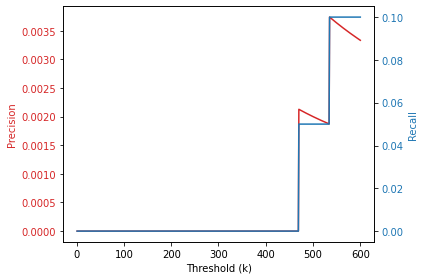

Graph for document 1


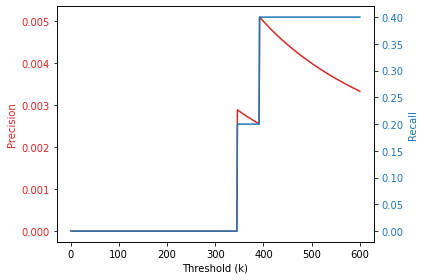

Graph for document 2


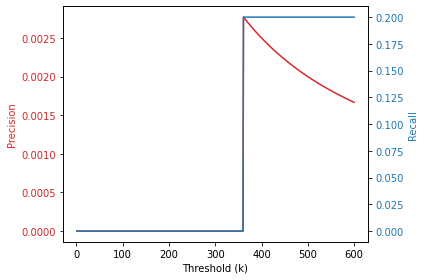

Graph for document 3


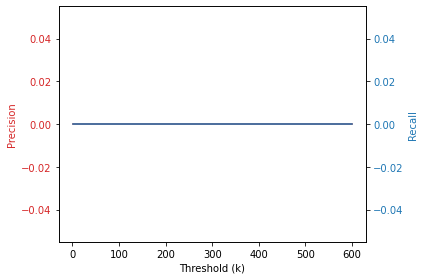

Graph for document 4


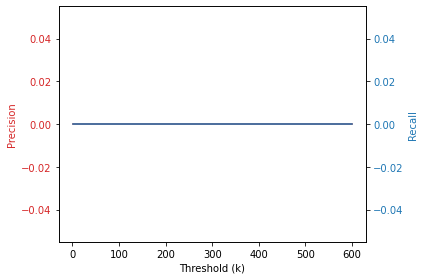

Graph for document 5


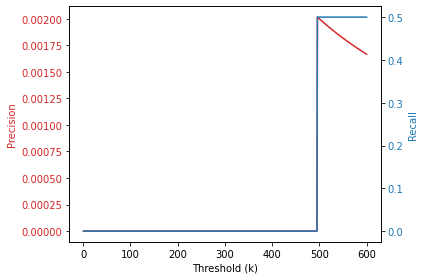

Graph for document 6


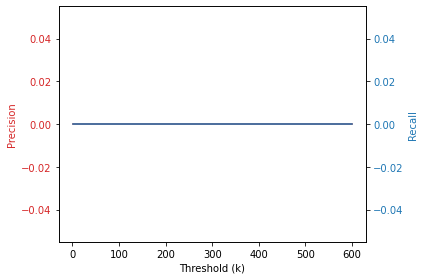

Graph for document 7


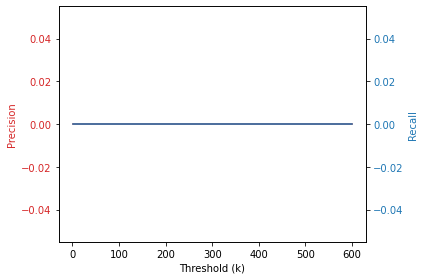

Graph for document 8


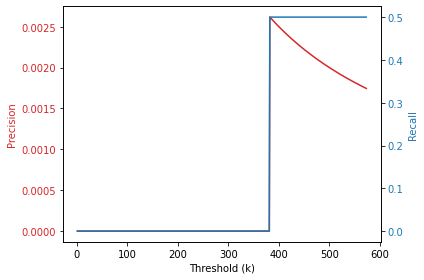

Graph for document 9


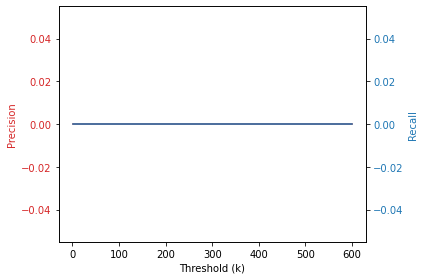

Graph for document 10


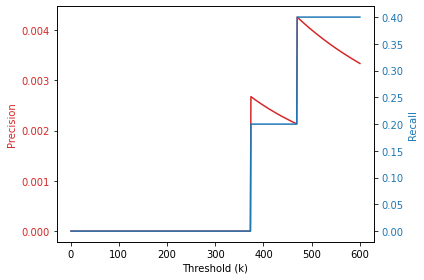

Graph for document 11


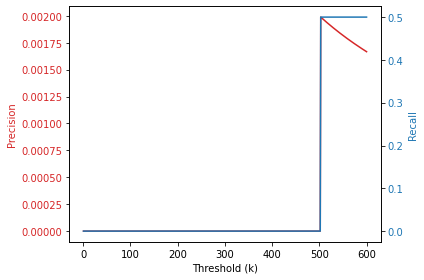

Graph for document 12


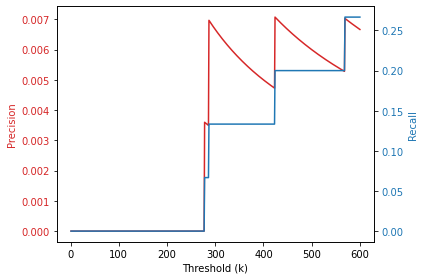

Graph for document 13


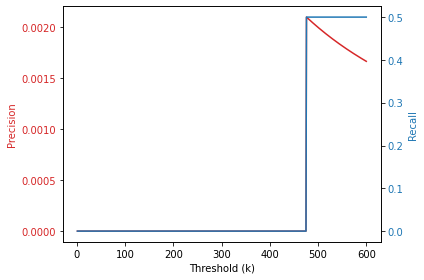

Graph for document 14


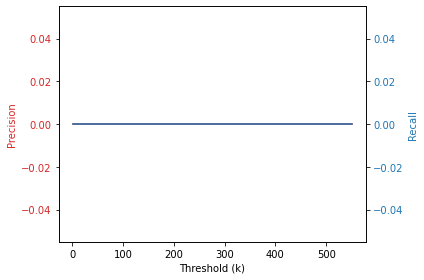

Graph for document 15


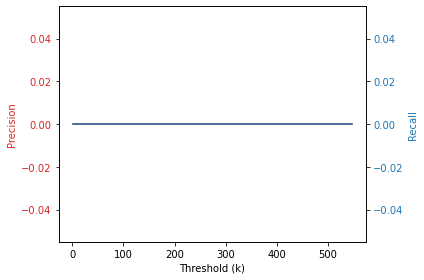

Graph for document 16


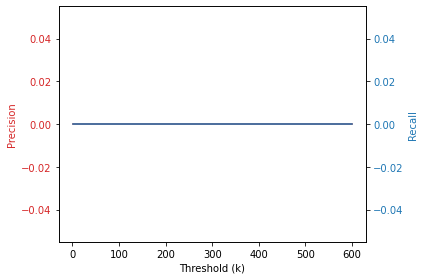

Graph for document 17


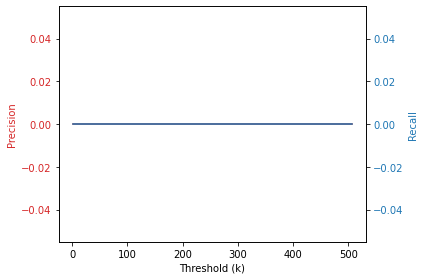

Graph for document 18


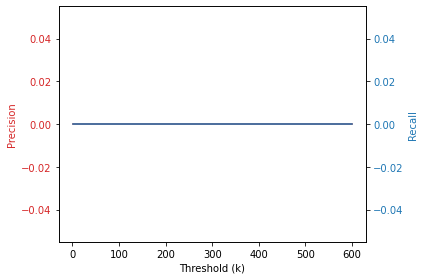

In [114]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values[i])+1))]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [115]:
check_new = [elem[0] for elem in keywords_keyphrases[0]]
check_new

['gesellschaftspolitischen',
 'gründlich arbeitet',
 'wissenschaftliche mitarbeiter insgesamt',
 'gesundheitliche probleme',
 'durchführen experimenten',
 'mitwirken aufbau forschungsinfrastruktur',
 'hohe arbeitsbelastung berufliche',
 'verfahren konfliktfällen',
 'verwaltungstätigkeiten',
 'mangelnde fremdsprachenkenntnisse',
 'transferable skills workshops',
 'verhält engagiert',
 'publikationen verschriftlichen ergebnissen',
 'kommunikativ gesprächig',
 'analysieren daten',
 'wissenschaftliche mitarbeiter fach',
 'ausüben verwaltungstätigkeiten',
 'arbeiten team',
 'konzeption forschungs erhebungsdesigns',
 'vereinbarkeit beruf familie',
 'hohe arbeitsbelastung',
 'fehlende beratungs unterstützungsangebote',
 'kulturelle schwierigkeiten',
 'forschungsdaten',
 'experimenten',
 'finanzierung publikationen',
 'teaching professionals',
 'zurückhaltend',
 'arbeitstitel',
 'schreiben sonstiger fachtexte',
 'aufstiegsmöglichkeiten',
 'künstlerische ästhetische erfahrungen',
 'eher faul',


In [116]:
ground_truth[0]

['wissenschaftssystem',
 'betreuung',
 'wissenschaftliche karriere',
 'promotionsformen',
 'promotionsmotive',
 'vereinbarkeit von familie und beruf',
 'monetäre erträge',
 'nicht-monetäre erträge',
 'wissenschaftlicher nachwuchs',
 'promotionsabbruch',
 'promovierende',
 'promotion',
 'strukturierte promotion',
 'persönlichkeit',
 'finanzierung',
 'mobilität',
 'gesundheit',
 'erwerbsverläufe',
 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft',
 'promovierte']

In [117]:
list(set(check_new).intersection(ground_truth[0]))

['promovierende', 'finanzierung']